# Loading/Formating/Minor Cleaning

## Loading

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('2022-2023.csv', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   55 non-null     object
 1   First        51 non-null     object
 2   Unnamed: 2   53 non-null     object
 3   Unnamed: 3   51 non-null     object
 4   Unnamed: 4   47 non-null     object
 5   Unnamed: 5   47 non-null     object
 6   Unnamed: 6   9 non-null      object
 7   Unnamed: 7   9 non-null      object
 8   Unnamed: 8   9 non-null      object
 9   Second       47 non-null     object
 10  Unnamed: 10  51 non-null     object
 11  Unnamed: 11  53 non-null     object
 12  Unnamed: 12  53 non-null     object
 13  Unnamed: 13  47 non-null     object
 14  Unnamed: 14  47 non-null     object
 15  Unnamed: 15  42 non-null     object
 16  Unnamed: 16  47 non-null     object
 17  Third        42 non-null     object
 18  Unnamed: 18  53 non-null     object
 19  Unnamed: 19  55 non-null     ob

In [37]:
df2024 = pd.read_csv('2024-2025.csv', header=0)
df2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   2024-2025      62 non-null     object
 1   First 8 Week   62 non-null     object
 2   Unnamed: 2     54 non-null     object
 3   Unnamed: 3     54 non-null     object
 4   Unnamed: 4     54 non-null     object
 5   Unnamed: 5     54 non-null     object
 6   Unnamed: 6     54 non-null     object
 7   Unnamed: 7     54 non-null     object
 8   Unnamed: 8     50 non-null     object
 9   Second 8 Week  59 non-null     object
 10  Unnamed: 10    54 non-null     object
 11  Unnamed: 11    54 non-null     object
 12  Unnamed: 12    54 non-null     object
 13  Unnamed: 13    51 non-null     object
 14  Unnamed: 14    54 non-null     object
 15  Unnamed: 15    54 non-null     object
 16  Unnamed: 16    51 non-null     object
 17  Third 8 Week   62 non-null     object
 18  Unnamed: 18    54 non-null     o

In [38]:
#assigning column consistencies due to mismatched data sets
muscles_2022 = ["Chest", "Shoulders", "Triceps", "Upper Back",
                "Traps", "Biceps", "Quads", "Hamstrings", "Calves"]

muscles_2024 = ["Chest", "Shoulder", "Triceps", "Upper Back",
                "Traps", "Bicep", "Quads", "Hamstrings", "Calves"]

In [39]:
print(df.head())

        Unnamed: 0   First Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0            Chest  Week 1     Week 2     Week 3     Week 4     Week 5   
1       Total Load       0      8,690      6,085      2,360      7,300   
2       Total Sets       0         15         14          8         13   
3       Total Reps       0        141        136         88        129   
4  Weights Per Rep     NaN         62         45         27         57   

  Unnamed: 6 Unnamed: 7 Unnamed: 8  Second  ... Unnamed: 31 Unnamed: 32  \
0     Week 6     Week 7     Week 8  Week 1  ...      Week 7      Week 8   
1        NaN        NaN        NaN   7,915  ...      10,520      12,434   
2        NaN        NaN        NaN      12  ...          19          21   
3        NaN        NaN        NaN     125  ...         235         237   
4        NaN        NaN        NaN      63  ...          45          52   

    Fifth Unnamed: 34 Unnamed: 35 Unnamed: 36 Unnamed: 37 Unnamed: 38  \
0  Week 1      Week 2      Week

In [40]:
df2024.head()

,2024-2025,First 8 Week,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Second 8 Week,...,Unnamed: 43,Unnamed: 44,Sevnth 8 Week,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Chest,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 1,...,Week 7,Week 8,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
1,Total Load,"5,030","6,171","6,856","7,872","8,540","8,619","9,502","9,660",0,...,"15,139","16,178","15,494","11,876","14,274","11,819","13,075","10,840","15,430","13,962"
2,Total Sets,9,11,10,10,12,13,12,13,0,...,14,15,15,15,14,14,14,14,14,15
3,Total Reps,90,95,98,92,90,89,94,92,0,...,112,115,109,107,93,101,87,102,119,110
4,Weights Per Rep,56,65,70,86,95,97,101,105,0,...,135,141,142,111,153,117,150,106,130,127


In [41]:
def auto_rename_weeks(df, year, block_sizes=None, default_block_size=8):
    cols = df.columns.tolist()
    new_cols = [cols[0]]
    block_num = 1
    week_in_block = 1
    block_index = 0

    if block_sizes is None:
        block_sizes = []

    for col in cols[1:]:
        new_name = f"Week {block_num}.{week_in_block}.{year}"
        new_cols.append(new_name)
        week_in_block += 1
        if block_index < len(block_sizes):
            current_block_size = block_sizes[block_index]
        else:
            current_block_size = default_block_size
        if week_in_block - 1 >= current_block_size:
            block_index += 1
            block_num += 1
            week_in_block = 1
    df.columns = new_cols
    return df
# The 1.1 meaning is 1 is Block 1 and the .1 is the Week. So Block 1|week 1 = 1.1. 1.2 = Block 1|Week 2
# Function to increase productivity

In [42]:
df = auto_rename_weeks(df, 2022, block_sizes=[8,8,8,8,8])
df2024 = auto_rename_weeks(df2024, 2024, block_sizes=[8,8,8,8,4])

In [43]:
print(df.columns) #verification of rename

Index(['Unnamed: 0', 'Week 1.1.2022', 'Week 1.2.2022', 'Week 1.3.2022',
       'Week 1.4.2022', 'Week 1.5.2022', 'Week 1.6.2022', 'Week 1.7.2022',
       'Week 1.8.2022', 'Week 2.1.2022', 'Week 2.2.2022', 'Week 2.3.2022',
       'Week 2.4.2022', 'Week 2.5.2022', 'Week 2.6.2022', 'Week 2.7.2022',
       'Week 2.8.2022', 'Week 3.1.2022', 'Week 3.2.2022', 'Week 3.3.2022',
       'Week 3.4.2022', 'Week 3.5.2022', 'Week 3.6.2022', 'Week 3.7.2022',
       'Week 3.8.2022', 'Week 4.1.2022', 'Week 4.2.2022', 'Week 4.3.2022',
       'Week 4.4.2022', 'Week 4.5.2022', 'Week 4.6.2022', 'Week 4.7.2022',
       'Week 4.8.2022', 'Week 5.1.2022', 'Week 5.2.2022', 'Week 5.3.2022',
       'Week 5.4.2022', 'Week 5.5.2022', 'Week 5.6.2022', 'Week 5.7.2022',
       'Week 5.8.2022'],
      dtype='object')


In [44]:
print(df2024.columns) #verification of rename

Index(['2024-2025', 'Week 1.1.2024', 'Week 1.2.2024', 'Week 1.3.2024',
       'Week 1.4.2024', 'Week 1.5.2024', 'Week 1.6.2024', 'Week 1.7.2024',
       'Week 1.8.2024', 'Week 2.1.2024', 'Week 2.2.2024', 'Week 2.3.2024',
       'Week 2.4.2024', 'Week 2.5.2024', 'Week 2.6.2024', 'Week 2.7.2024',
       'Week 2.8.2024', 'Week 3.1.2024', 'Week 3.2.2024', 'Week 3.3.2024',
       'Week 3.4.2024', 'Week 3.5.2024', 'Week 3.6.2024', 'Week 3.7.2024',
       'Week 3.8.2024', 'Week 4.1.2024', 'Week 4.2.2024', 'Week 4.3.2024',
       'Week 4.4.2024', 'Week 4.5.2024', 'Week 4.6.2024', 'Week 4.7.2024',
       'Week 4.8.2024', 'Week 5.1.2024', 'Week 5.2.2024', 'Week 5.3.2024',
       'Week 5.4.2024', 'Week 6.1.2024', 'Week 6.2.2024', 'Week 6.3.2024',
       'Week 6.4.2024', 'Week 6.5.2024', 'Week 6.6.2024', 'Week 6.7.2024',
       'Week 6.8.2024', 'Week 7.1.2024', 'Week 7.2.2024', 'Week 7.3.2024',
       'Week 7.4.2024', 'Week 7.5.2024', 'Week 7.6.2024', 'Week 7.7.2024',
       'Week 7.8.2024'],
    

In [45]:
print(df.describe())

        Unnamed: 0 Week 1.1.2022 Week 1.2.2022 Week 1.3.2022 Week 1.4.2022  \
count           55            51            53            51            47   
unique          15            30            41            38            26   
top     Total Load        Week 1        Week 2        Week 3             0   
freq             9             9             9             9            12   

       Week 1.5.2022 Week 1.6.2022 Week 1.7.2022 Week 1.8.2022 Week 2.1.2022  \
count             47             9             9             9            47   
unique            26             1             1             1            27   
top                0        Week 6        Week 7        Week 8             0   
freq              12             9             9             9            12   

        ... Week 4.7.2022 Week 4.8.2022 Week 5.1.2022 Week 5.2.2022  \
count   ...            51            55            55            45   
unique  ...            36            44            45            2

In [46]:
df2024.describe()

,2024-2025,Week 1.1.2024,Week 1.2.2024,Week 1.3.2024,Week 1.4.2024,Week 1.5.2024,Week 1.6.2024,Week 1.7.2024,Week 1.8.2024,Week 2.1.2024,...,Week 6.7.2024,Week 6.8.2024,Week 7.1.2024,Week 7.2.2024,Week 7.3.2024,Week 7.4.2024,Week 7.5.2024,Week 7.6.2024,Week 7.7.2024,Week 7.8.2024
count,62,62,54,54,54,54,54,54,50,59,...,54,54,62,54,54,54,54,52,54,54
unique,16,35,43,42,38,38,42,42,26,31,...,43,43,45,45,43,41,45,39,41,44
top,Total Load,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,0,0,...,Week 7,Week 8,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
freq,9,9,9,9,9,9,9,9,16,12,...,9,9,9,9,9,9,9,9,9,9


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     55 non-null     object
 1   Week 1.1.2022  51 non-null     object
 2   Week 1.2.2022  53 non-null     object
 3   Week 1.3.2022  51 non-null     object
 4   Week 1.4.2022  47 non-null     object
 5   Week 1.5.2022  47 non-null     object
 6   Week 1.6.2022  9 non-null      object
 7   Week 1.7.2022  9 non-null      object
 8   Week 1.8.2022  9 non-null      object
 9   Week 2.1.2022  47 non-null     object
 10  Week 2.2.2022  51 non-null     object
 11  Week 2.3.2022  53 non-null     object
 12  Week 2.4.2022  53 non-null     object
 13  Week 2.5.2022  47 non-null     object
 14  Week 2.6.2022  47 non-null     object
 15  Week 2.7.2022  42 non-null     object
 16  Week 2.8.2022  47 non-null     object
 17  Week 3.1.2022  42 non-null     object
 18  Week 3.2.2022  53 non-null     o

In [48]:
df2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   2024-2025      62 non-null     object
 1   Week 1.1.2024  62 non-null     object
 2   Week 1.2.2024  54 non-null     object
 3   Week 1.3.2024  54 non-null     object
 4   Week 1.4.2024  54 non-null     object
 5   Week 1.5.2024  54 non-null     object
 6   Week 1.6.2024  54 non-null     object
 7   Week 1.7.2024  54 non-null     object
 8   Week 1.8.2024  50 non-null     object
 9   Week 2.1.2024  59 non-null     object
 10  Week 2.2.2024  54 non-null     object
 11  Week 2.3.2024  54 non-null     object
 12  Week 2.4.2024  54 non-null     object
 13  Week 2.5.2024  51 non-null     object
 14  Week 2.6.2024  54 non-null     object
 15  Week 2.7.2024  54 non-null     object
 16  Week 2.8.2024  51 non-null     object
 17  Week 3.1.2024  62 non-null     object
 18  Week 3.2.2024  54 non-null     o

## Functions

In [49]:
def create_metric_table(df, muscles, metrics=None):
  if metrics is None:
    metrics = ["Total Load", "Total Sets", "Total Reps", "Weights Per Rep" ]
  weeks = df.columns[1:]
  tables = {metric : pd.DataFrame(index=weeks, columns=muscles) for metric in metrics}
  col0 = df.iloc[:, 0].astype(str)
  for i, muscle in enumerate(muscles):
    muscle_rows = col0[col0.str.strip() == muscle]
    if muscle_rows.empty:
      continue
    muscle_idx = muscle_rows.index[0]
    if i < len(muscles) - 1:
      next_muscle_idx = col0[col0.str.strip() == muscles[i + 1]].index[0]
    else:
      next_muscle_idx = len(df)
    muscle_block = df.iloc[muscle_idx+1 : next_muscle_idx, :]
    for metric in metrics:
      mask = muscle_block.iloc[:,0].str.strip() == metric
      if mask.any():
        metric_row = muscle_block[mask].iloc[0, 1:]
        tables[metric][muscle] = metric_row.values.flatten()
      else:
        tables[metric][muscle] = np.nan
  return tables
  #creates table dictionaires

In [50]:
def clean(df, metric_name=None, fill_value=0, exclude_cols=None):
  if exclude_cols is None:
        exclude_cols = []
  df_clean = df.copy()
  for col in df_clean.columns:
      if col in exclude_cols:
            continue  # skip cleaning for Week columns
      col_data = df_clean[col].astype(str).str.replace(',', '', regex=False).str.strip()
      df_clean[col] = pd.to_numeric(col_data, errors='coerce')
      df_clean[col] = df_clean[col].fillna(fill_value)
      if metric_name is not None:
            if metric_name in ["Total Load", "Total Sets", "Total Reps"]:
                df_clean[col] = df_clean[col].astype("Int64")
            elif metric_name == "Weights Per Rep":
                df_clean[col] = df_clean[col].astype(float)
  return df_clean
  #creates the ability to clean tables

In [51]:
tables_2022 = create_metric_table(df, muscles_2022)

In [52]:
tables_2024 = create_metric_table(df2024, muscles_2024)


## Data Frame Minor Clean

In [53]:
df.fillna(0)

,Unnamed: 0,Week 1.1.2022,Week 1.2.2022,Week 1.3.2022,Week 1.4.2022,Week 1.5.2022,Week 1.6.2022,Week 1.7.2022,Week 1.8.2022,Week 2.1.2022,...,Week 4.7.2022,Week 4.8.2022,Week 5.1.2022,Week 5.2.2022,Week 5.3.2022,Week 5.4.2022,Week 5.5.2022,Week 5.6.2022,Week 5.7.2022,Week 5.8.2022
0,Chest,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 1,...,Week 7,Week 8,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
1,Total Load,0,"8,690","6,085","2,360","7,300",0,0,0,"7,915",...,"10,520","12,434","12,075",0,"15,804","13,600",0,"16,595",0,0
2,Total Sets,0,15,14,8,13,0,0,0,12,...,19,21,23,0,24,20,0,27,0,0
3,Total Reps,0,141,136,88,129,0,0,0,125,...,235,237,259,0,264,255,0,373,0,0
4,Weights Per Rep,0,62,45,27,57,0,0,0,63,...,45,52,47,0,60,53,0,44,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Weights Per Rep,148,99,50,0,0,0,0,0,120,...,0,157,207,0,207,0,0,108,0,0
61,Percentage Change,0%,-49%,-98%,0,0,0,0,0,58%,...,0,3%,24%,0,0%,0,0,-92%,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df2024.fillna(0)

,2024-2025,Week 1.1.2024,Week 1.2.2024,Week 1.3.2024,Week 1.4.2024,Week 1.5.2024,Week 1.6.2024,Week 1.7.2024,Week 1.8.2024,Week 2.1.2024,...,Week 6.7.2024,Week 6.8.2024,Week 7.1.2024,Week 7.2.2024,Week 7.3.2024,Week 7.4.2024,Week 7.5.2024,Week 7.6.2024,Week 7.7.2024,Week 7.8.2024
0,Chest,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 1,...,Week 7,Week 8,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
1,Total Load,"5,030","6,171","6,856","7,872","8,540","8,619","9,502","9,660",0,...,"15,139","16,178","15,494","11,876","14,274","11,819","13,075","10,840","15,430","13,962"
2,Total Sets,9,11,10,10,12,13,12,13,0,...,14,15,15,15,14,14,14,14,14,15
3,Total Reps,90,95,98,92,90,89,94,92,0,...,112,115,109,107,93,101,87,102,119,110
4,Weights Per Rep,56,65,70,86,95,97,101,105,0,...,135,141,142,111,153,117,150,106,130,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Total Load,"17,340","24,315","26,475","32,445","55,386","61,398","67,880",0,"22,806",...,"53,250","53,325","29,025","33,765","35,460","37,920","24,360","7,800","38,100","46,860"
58,Total Sets,9,12,12,12,15,15,15,0,9,...,12,12,5,8,8,8,4,3,4,8
59,Total Reps,132,180,180,180,270,270,270,0,138,...,180,180,75,117,120,120,60,22,120,120
60,Weights Per Rep,131,135,147,180,205,227,251,0,165,...,296,296,387,289,296,316,406,355,318,391


# Organizing 2022-2023

## Table Creation

In [55]:
def prepare_metric_table(tables_dict, metric_name):
    df = tables_dict[metric_name].reset_index().rename(columns={'index': 'Week'})
    df = clean(df, metric_name=metric_name, exclude_cols=['Week', 'Week_Number', 'Frame', 'Week_in_Frame'])
    df['Week_Number'] = df['Week'].astype(str).apply(
        lambda x: float(re.search(r'\d+\.\d+', x).group()) if re.search(r'\d+\.\d+', x) else float(x)
    )
    df['Frame'] = df['Week_Number'].apply(lambda x: int(x))
    df['Week_in_Frame'] = ((df['Week_Number'] - df['Frame']) * 10).round().astype(int)
    week_cols = ['Week', 'Week_Number', 'Frame', 'Week_in_Frame']
    muscle_cols = [c for c in df.columns if c not in week_cols]
    df = df[week_cols + muscle_cols]
    return df

In [56]:
metrics = ["Total Load", "Total Sets", "Total Reps", "Weights Per Rep"]
tables_2022_cleaned = {metric: prepare_metric_table(tables_2022, metric) for metric in metrics}
tables_2024_cleaned = {metric: prepare_metric_table(tables_2024, metric) for metric in metrics}

In [57]:
rename_map_2024 = {
    "Shoulder": "Shoulders",
    "Bicep": "Biceps"
}

for metric, df in tables_2024_cleaned.items():
    df.rename(columns=rename_map_2024, inplace=True)

In [58]:
for metric, df in tables_2024_cleaned.items():
    print(f"{metric} columns:", df.columns.tolist())

Total Load columns: ['Week', 'Week_Number', 'Frame', 'Week_in_Frame', 'Chest', 'Shoulders', 'Triceps', 'Upper Back', 'Traps', 'Biceps', 'Quads', 'Hamstrings', 'Calves']
Total Sets columns: ['Week', 'Week_Number', 'Frame', 'Week_in_Frame', 'Chest', 'Shoulders', 'Triceps', 'Upper Back', 'Traps', 'Biceps', 'Quads', 'Hamstrings', 'Calves']
Total Reps columns: ['Week', 'Week_Number', 'Frame', 'Week_in_Frame', 'Chest', 'Shoulders', 'Triceps', 'Upper Back', 'Traps', 'Biceps', 'Quads', 'Hamstrings', 'Calves']
Weights Per Rep columns: ['Week', 'Week_Number', 'Frame', 'Week_in_Frame', 'Chest', 'Shoulders', 'Triceps', 'Upper Back', 'Traps', 'Biceps', 'Quads', 'Hamstrings', 'Calves']


## Verification

Metric: Total Load
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           40 non-null     object 
 1   Week_Number    40 non-null     float64
 2   Frame          40 non-null     int64  
 3   Week_in_Frame  40 non-null     int64  
 4   Chest          40 non-null     Int64  
 5   Shoulders      40 non-null     Int64  
 6   Triceps        40 non-null     Int64  
 7   Upper Back     40 non-null     Int64  
 8   Traps          40 non-null     Int64  
 9   Biceps         40 non-null     Int64  
 10  Quads          40 non-null     Int64  
 11  Hamstrings     40 non-null     Int64  
 12  Calves         40 non-null     Int64  
dtypes: Int64(9), float64(1), int64(2), object(1)
memory usage: 4.5+ KB
None
       Week_Number     Frame  Week_in_Frame       Chest    Shoulders  \
count    40.000000  40.00000      40.000000        40.0         40.0 

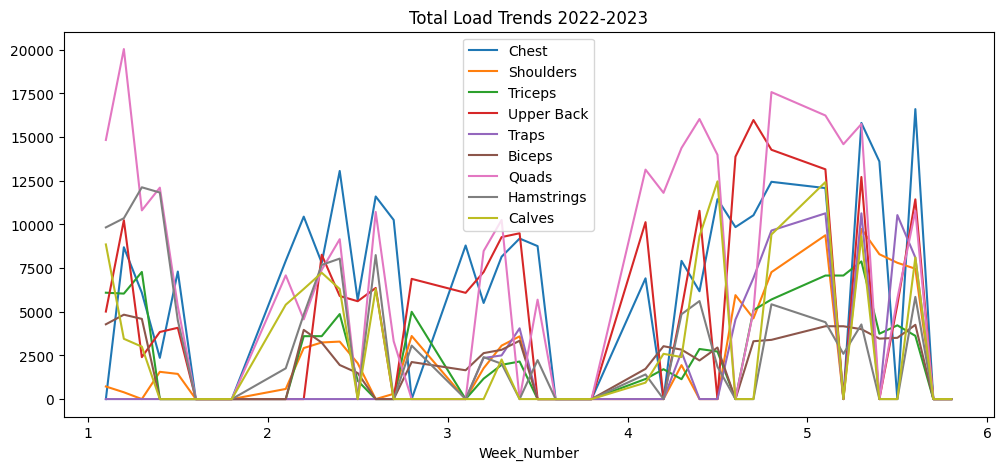

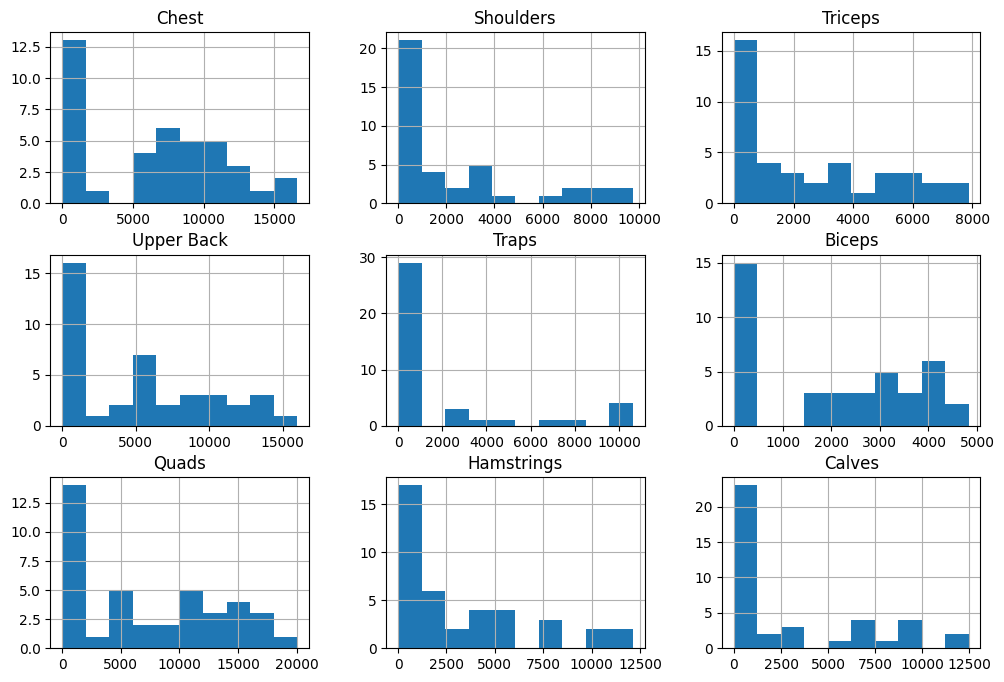

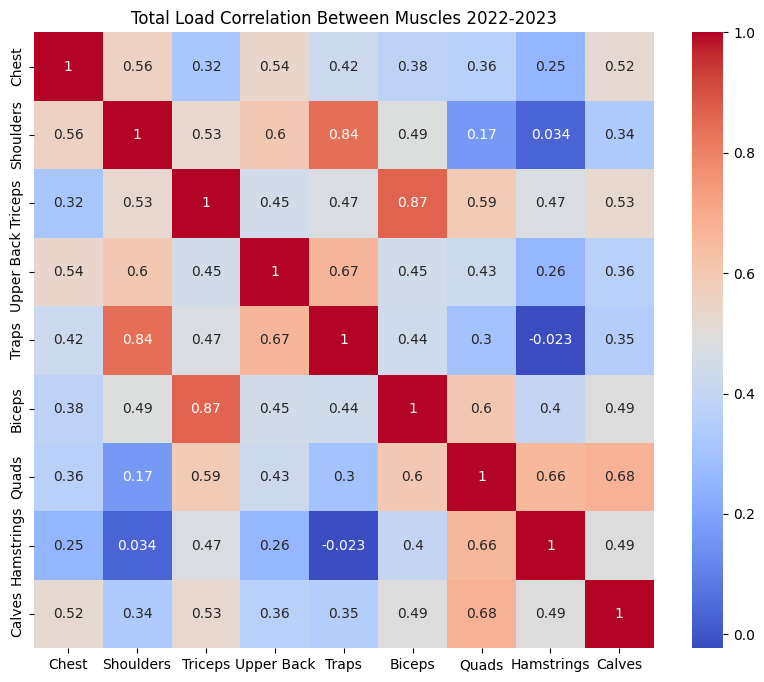

Highest correlation: ('Triceps', 'Biceps') = 0.87
Lowest correlation: ('Traps', 'Hamstrings') = -0.02

Metric: Total Sets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           40 non-null     object 
 1   Week_Number    40 non-null     float64
 2   Frame          40 non-null     int64  
 3   Week_in_Frame  40 non-null     int64  
 4   Chest          40 non-null     Int64  
 5   Shoulders      40 non-null     Int64  
 6   Triceps        40 non-null     Int64  
 7   Upper Back     40 non-null     Int64  
 8   Traps          40 non-null     Int64  
 9   Biceps         40 non-null     Int64  
 10  Quads          40 non-null     Int64  
 11  Hamstrings     40 non-null     Int64  
 12  Calves         40 non-null     Int64  
dtypes: Int64(9), float64(1), int64(2), object(1)
memory usage: 4.5+ KB
None
       Week_Number     Frame  Week_in_

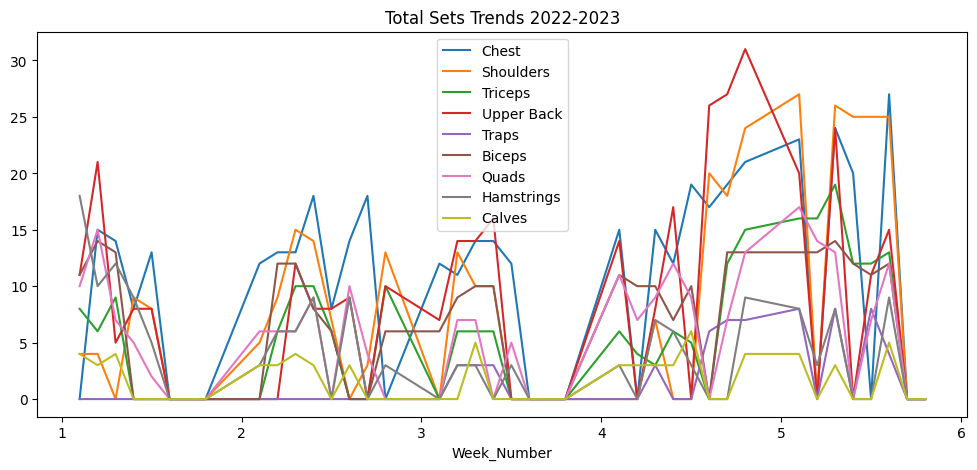

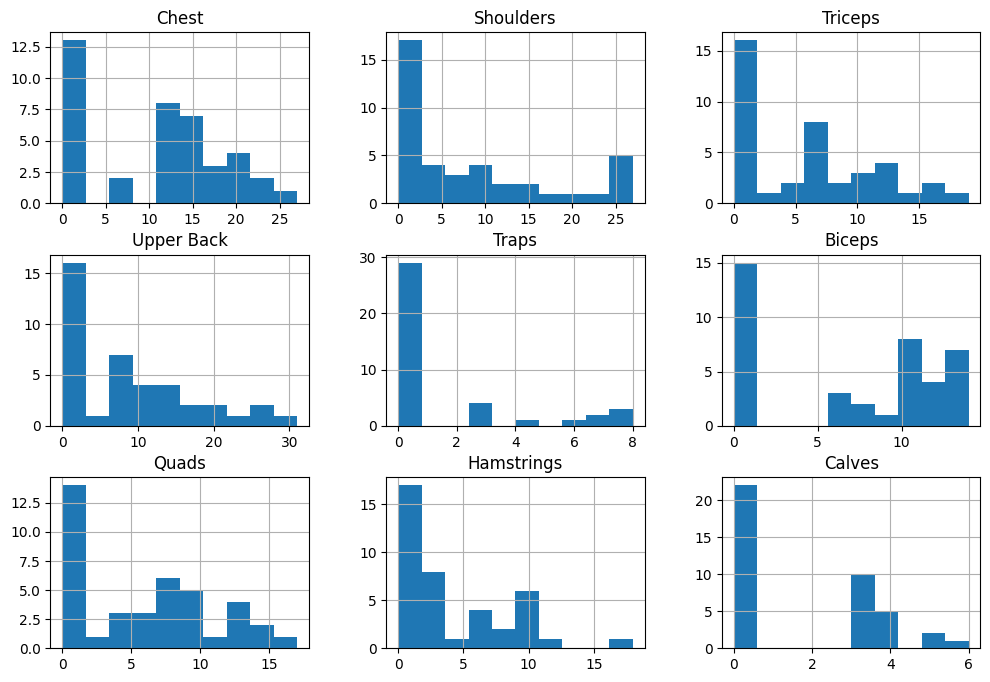

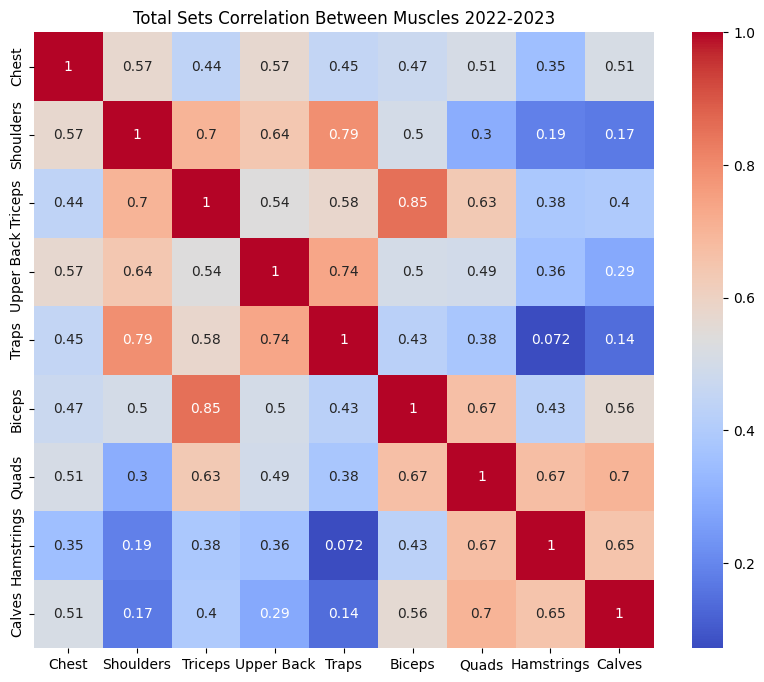

Highest correlation: ('Triceps', 'Biceps') = 0.85
Lowest correlation: ('Traps', 'Hamstrings') = 0.07

Metric: Total Reps
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           40 non-null     object 
 1   Week_Number    40 non-null     float64
 2   Frame          40 non-null     int64  
 3   Week_in_Frame  40 non-null     int64  
 4   Chest          40 non-null     Int64  
 5   Shoulders      40 non-null     Int64  
 6   Triceps        40 non-null     Int64  
 7   Upper Back     40 non-null     Int64  
 8   Traps          40 non-null     Int64  
 9   Biceps         40 non-null     Int64  
 10  Quads          40 non-null     Int64  
 11  Hamstrings     40 non-null     Int64  
 12  Calves         40 non-null     Int64  
dtypes: Int64(9), float64(1), int64(2), object(1)
memory usage: 4.5+ KB
None
       Week_Number     Frame  Week_in_F

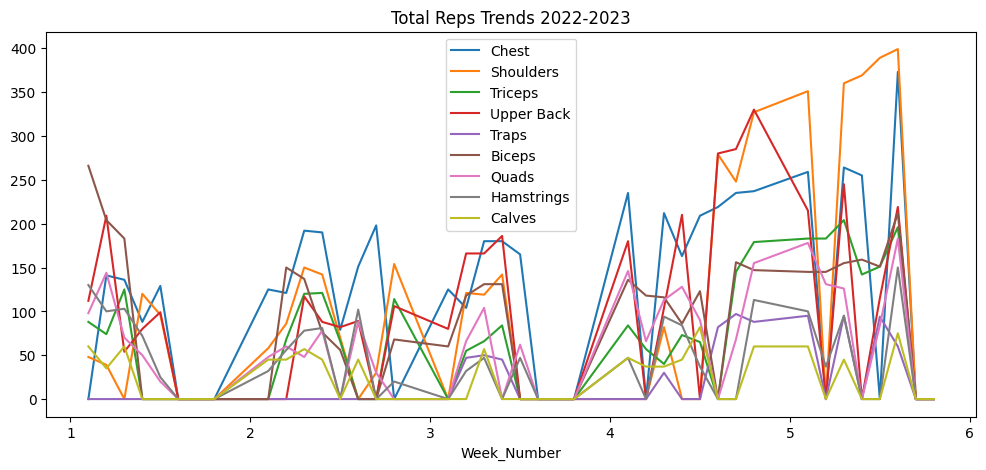

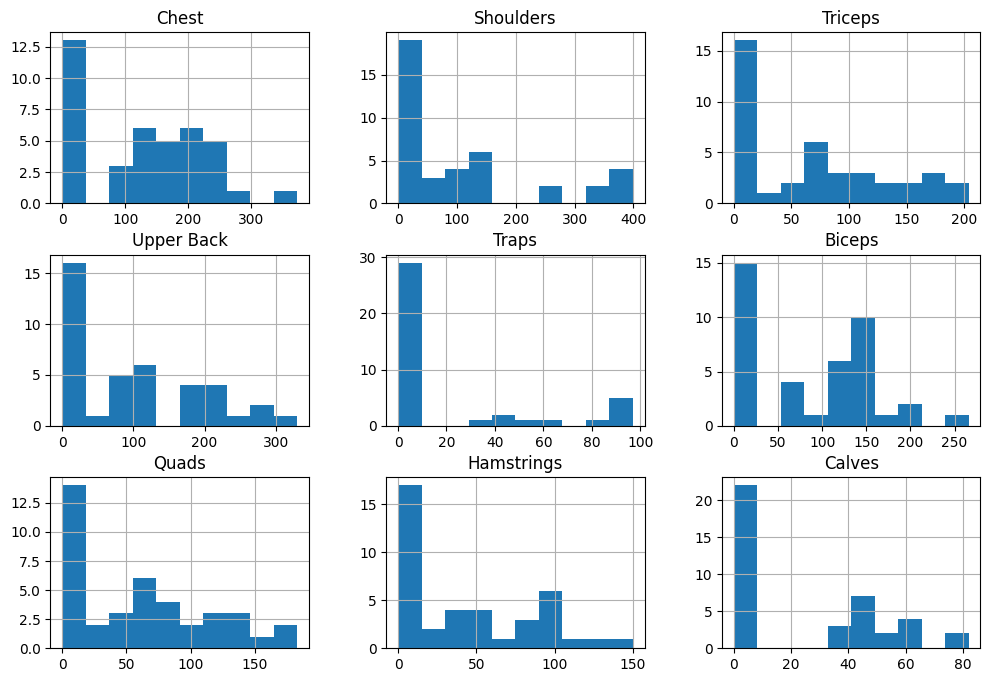

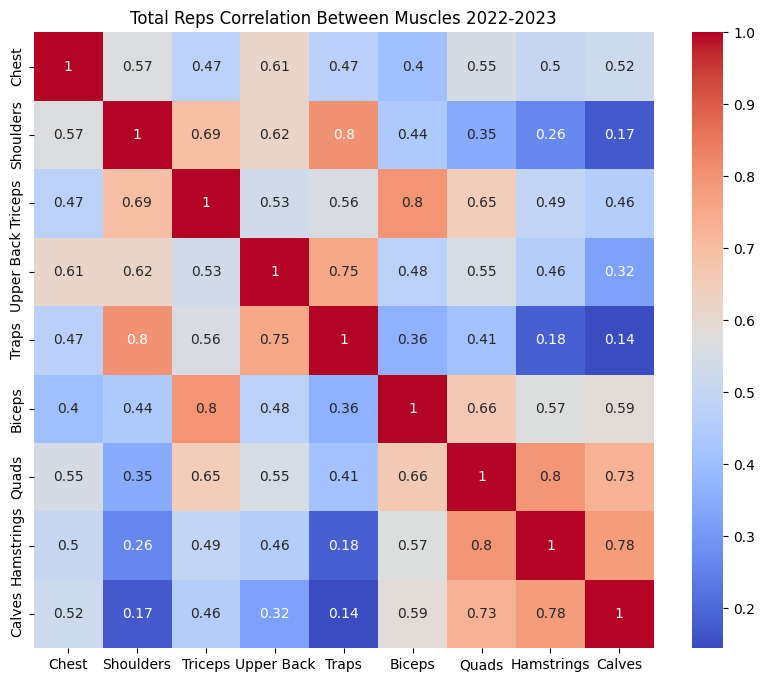

Highest correlation: ('Shoulders', 'Traps') = 0.80
Lowest correlation: ('Traps', 'Calves') = 0.14

Metric: Weights Per Rep
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           40 non-null     object 
 1   Week_Number    40 non-null     float64
 2   Frame          40 non-null     int64  
 3   Week_in_Frame  40 non-null     int64  
 4   Chest          40 non-null     float64
 5   Shoulders      40 non-null     float64
 6   Triceps        40 non-null     float64
 7   Upper Back     40 non-null     float64
 8   Traps          40 non-null     float64
 9   Biceps         40 non-null     float64
 10  Quads          40 non-null     float64
 11  Hamstrings     40 non-null     float64
 12  Calves         40 non-null     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 4.2+ KB
None
       Week_Number     Frame  Week_in_Frame   

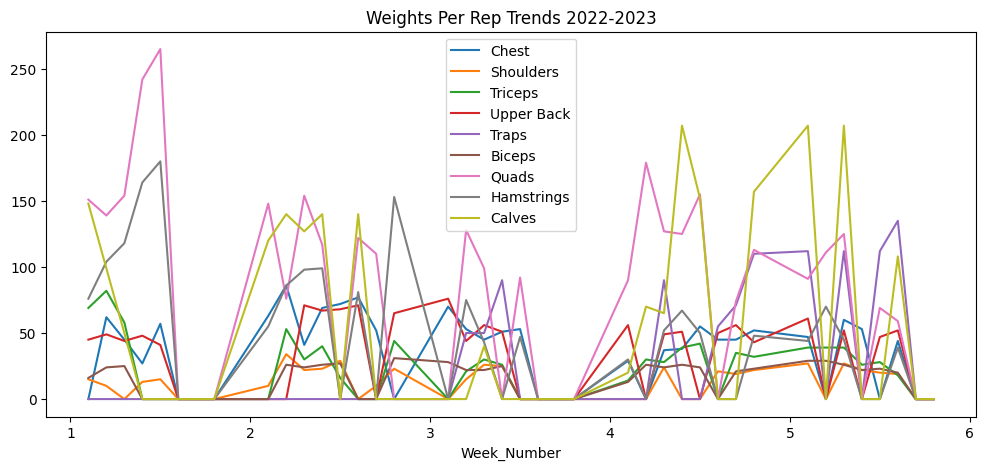

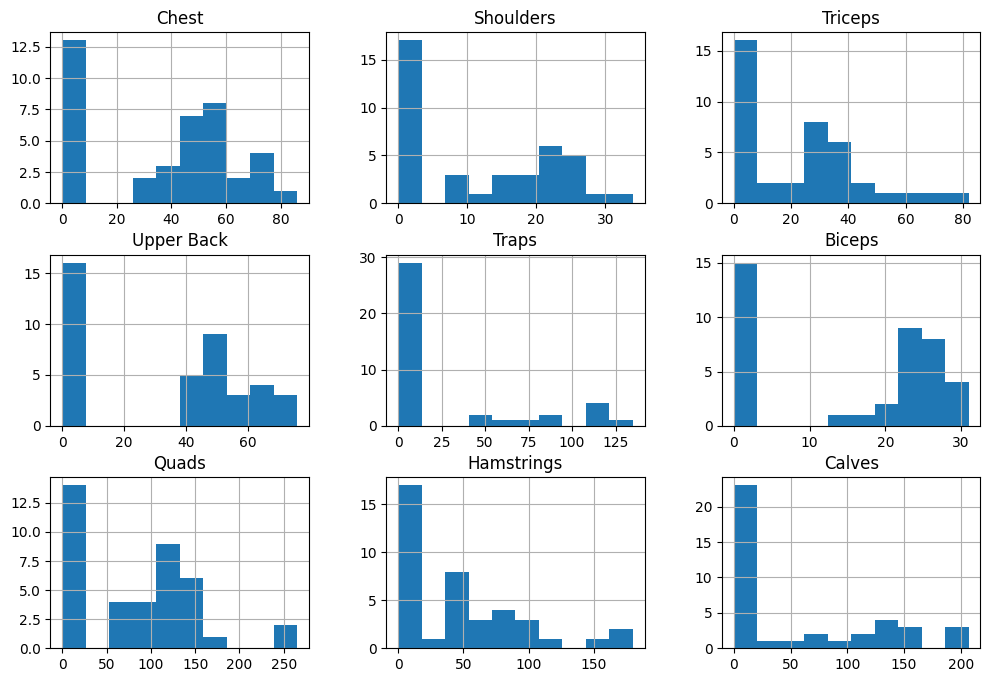

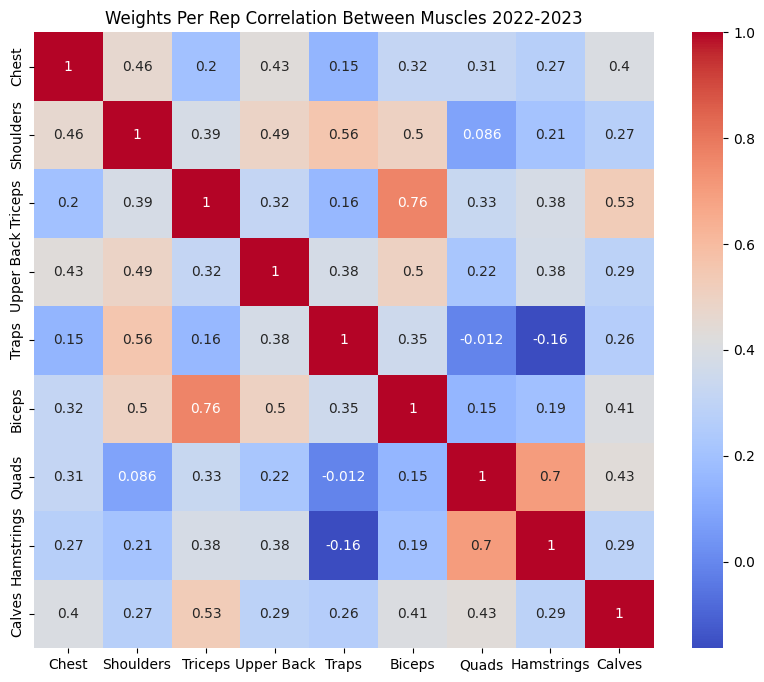

Highest correlation: ('Triceps', 'Biceps') = 0.76
Lowest correlation: ('Traps', 'Hamstrings') = -0.16



In [59]:
for metric, df in tables_2022_cleaned.items():
    print(f"Metric: {metric}")
    ignore_cols = ["Week", "Week_Number", "Frame", "Week_in_Frame"]
    muscle_cols = [c for c in df.columns if c not in ignore_cols]
    print(df.info())
    print(df.describe())
    print((df != 0).sum())
    #plot
    df.plot(x= "Week_Number", y= muscle_cols, figsize=(12,5), title=f"{metric} Trends 2022-2023")
    #histogram
    df[muscle_cols].hist(figsize=(12,8))
    #heatmap
    corr_matrix = df[muscle_cols].corr()  # now only muscles
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title(f"{metric} Correlation Between Muscles 2022-2023")
    plt.show()
    #shows my high/lows
    mask = np.eye(len(corr_matrix), dtype=bool)
    corr_values = corr_matrix.mask(mask)
    max_corr = corr_values.stack().idxmax()
    max_value = corr_values.stack().max()
    min_corr = corr_values.stack().idxmin()
    min_value = corr_values.stack().min()
    print(f"Highest correlation: {max_corr} = {max_value:.2f}")
    print(f"Lowest correlation: {min_corr} = {min_value:.2f}\n")
    plt.show()

- Most Frequently Trained Muscles:
  - Chest and Quads are the most frequented muscle group.
  - Traps and Calves tend to have the least hit muscle group
- High Load Spikes:
  - Week 0 has the highest spike due to it being the baseline and start of workout trends
- Muscle Balance:
  - Traps contiune to be the weakest growth area in terms of distrubption.
- Trends over time:
  -  There are bumps of growth as time continues to move forwards
- Potential ares of improvement:
  - See previous notes

# Organizing 2024-2025

## Verification

Metric: Total Load
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           52 non-null     object 
 1   Week_Number    52 non-null     float64
 2   Frame          52 non-null     int64  
 3   Week_in_Frame  52 non-null     int64  
 4   Chest          52 non-null     Int64  
 5   Shoulders      52 non-null     Int64  
 6   Triceps        52 non-null     Int64  
 7   Upper Back     52 non-null     Int64  
 8   Traps          52 non-null     Int64  
 9   Biceps         52 non-null     Int64  
 10  Quads          52 non-null     Int64  
 11  Hamstrings     52 non-null     Int64  
 12  Calves         52 non-null     Int64  
dtypes: Int64(9), float64(1), int64(2), object(1)
memory usage: 5.9+ KB
None
       Week_Number      Frame  Week_in_Frame         Chest    Shoulders  \
count    52.000000  52.000000      52.000000          52.0        

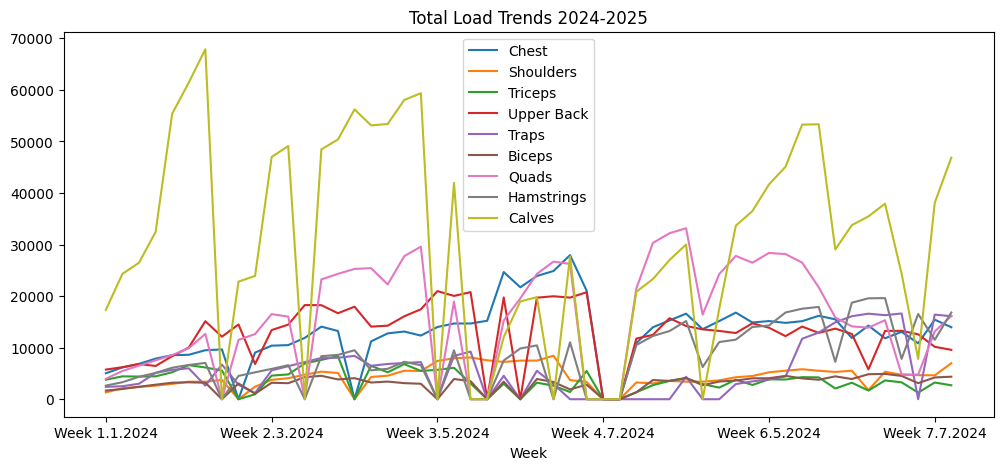

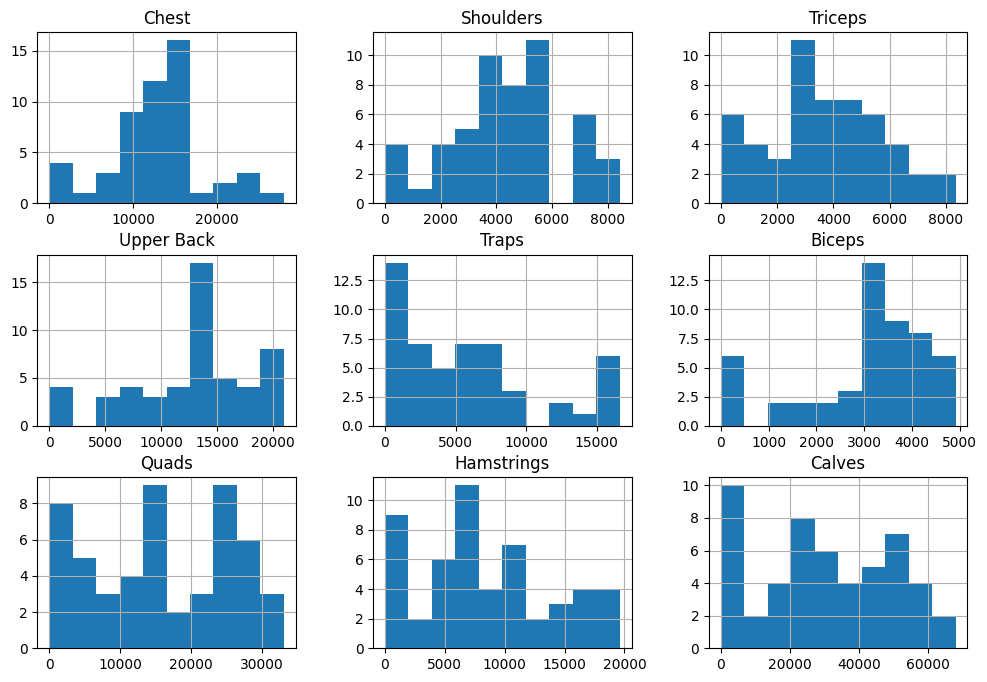

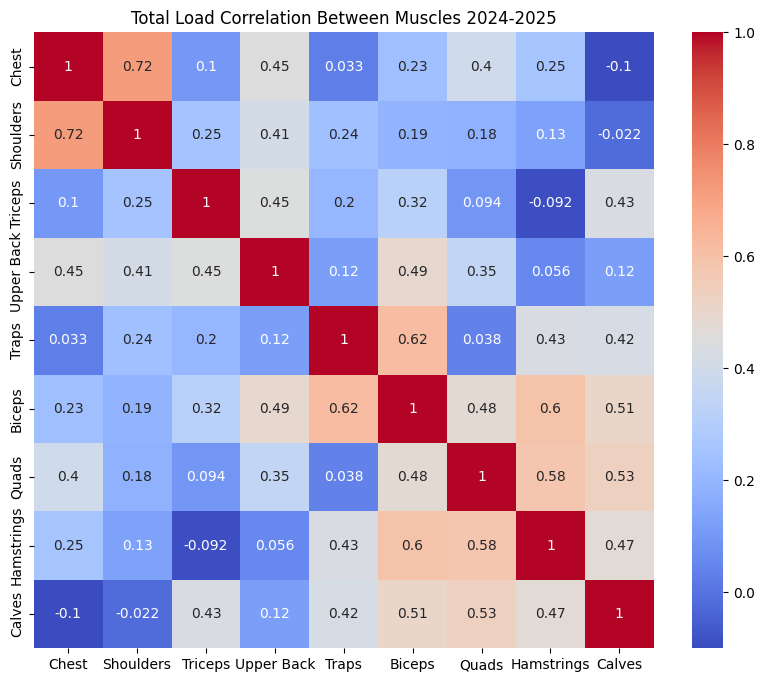

Highest correlation: ('Chest', 'Shoulders') = 0.72
Lowest correlation: ('Chest', 'Calves') = -0.10

Metric: Total Sets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           52 non-null     object 
 1   Week_Number    52 non-null     float64
 2   Frame          52 non-null     int64  
 3   Week_in_Frame  52 non-null     int64  
 4   Chest          52 non-null     Int64  
 5   Shoulders      52 non-null     Int64  
 6   Triceps        52 non-null     Int64  
 7   Upper Back     52 non-null     Int64  
 8   Traps          52 non-null     Int64  
 9   Biceps         52 non-null     Int64  
 10  Quads          52 non-null     Int64  
 11  Hamstrings     52 non-null     Int64  
 12  Calves         52 non-null     Int64  
dtypes: Int64(9), float64(1), int64(2), object(1)
memory usage: 5.9+ KB
None
       Week_Number      Frame  Week_in_Fr

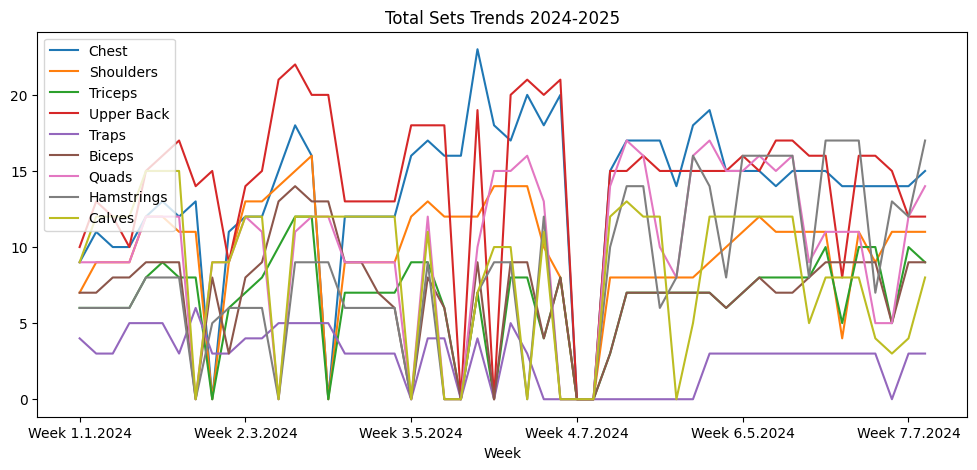

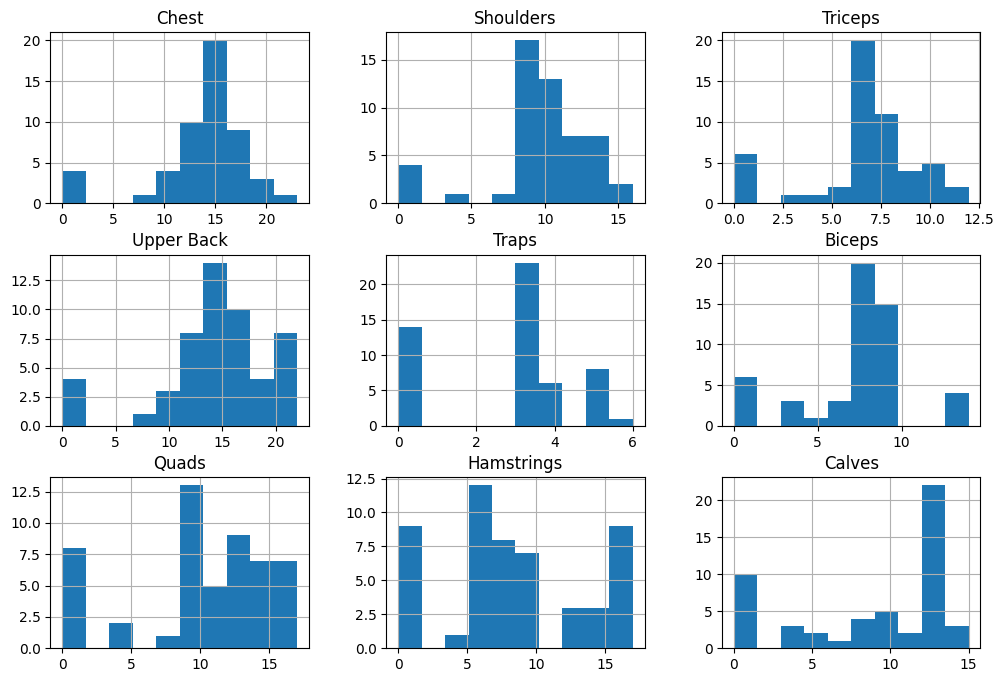

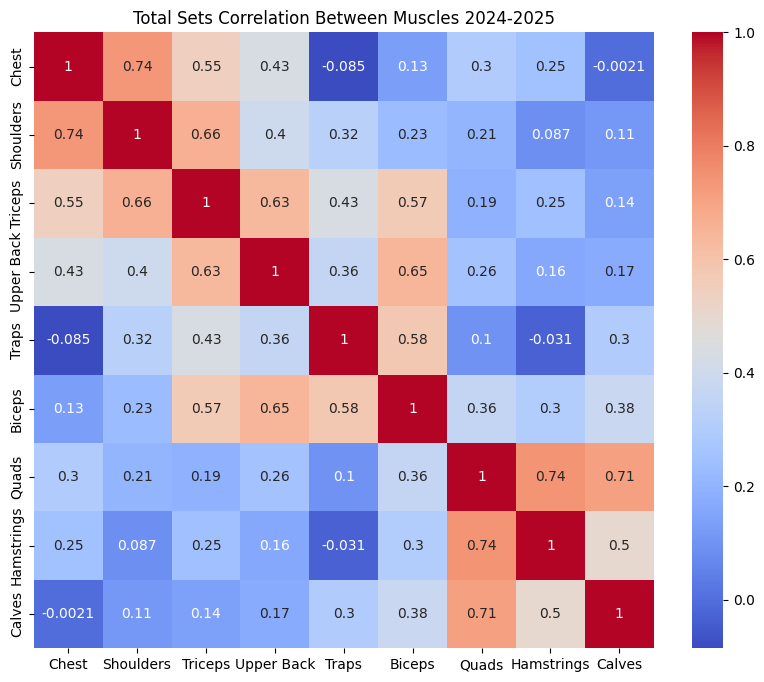

Highest correlation: ('Quads', 'Hamstrings') = 0.74
Lowest correlation: ('Chest', 'Traps') = -0.09

Metric: Total Reps
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           52 non-null     object 
 1   Week_Number    52 non-null     float64
 2   Frame          52 non-null     int64  
 3   Week_in_Frame  52 non-null     int64  
 4   Chest          52 non-null     Int64  
 5   Shoulders      52 non-null     Int64  
 6   Triceps        52 non-null     Int64  
 7   Upper Back     52 non-null     Int64  
 8   Traps          52 non-null     Int64  
 9   Biceps         52 non-null     Int64  
 10  Quads          52 non-null     Int64  
 11  Hamstrings     52 non-null     Int64  
 12  Calves         52 non-null     Int64  
dtypes: Int64(9), float64(1), int64(2), object(1)
memory usage: 5.9+ KB
None
       Week_Number      Frame  Week_in_Fr

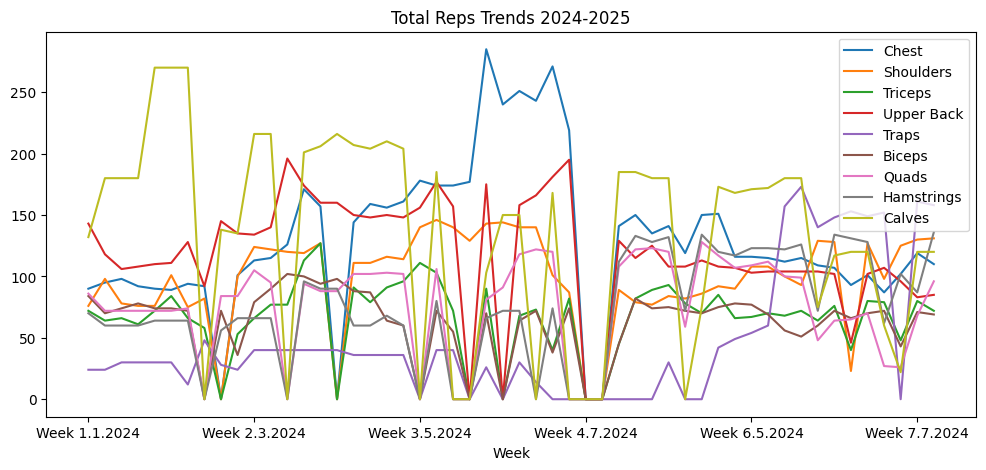

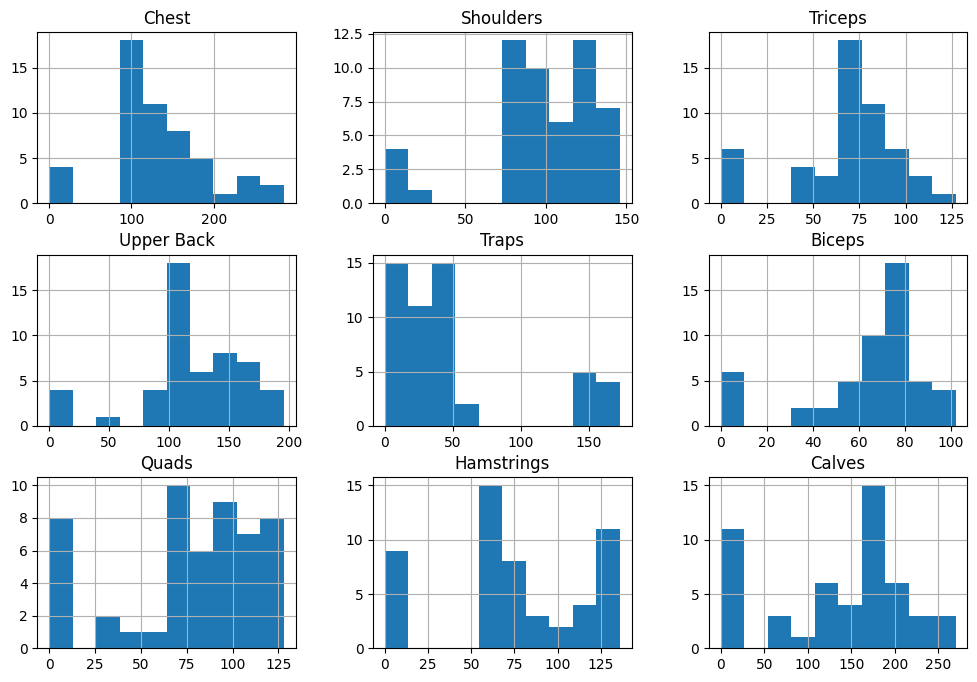

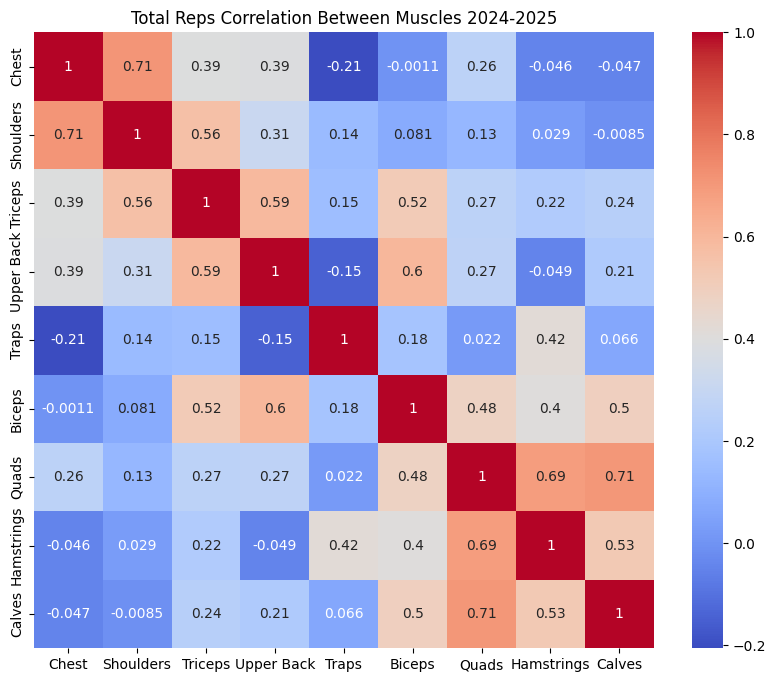

Highest correlation: ('Chest', 'Shoulders') = 0.71
Lowest correlation: ('Chest', 'Traps') = -0.21

Metric: Weights Per Rep
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Week           52 non-null     object 
 1   Week_Number    52 non-null     float64
 2   Frame          52 non-null     int64  
 3   Week_in_Frame  52 non-null     int64  
 4   Chest          52 non-null     float64
 5   Shoulders      52 non-null     float64
 6   Triceps        52 non-null     float64
 7   Upper Back     52 non-null     float64
 8   Traps          52 non-null     float64
 9   Biceps         52 non-null     float64
 10  Quads          52 non-null     float64
 11  Hamstrings     52 non-null     float64
 12  Calves         52 non-null     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 5.4+ KB
None
       Week_Number      Frame  Week_in_Frame  

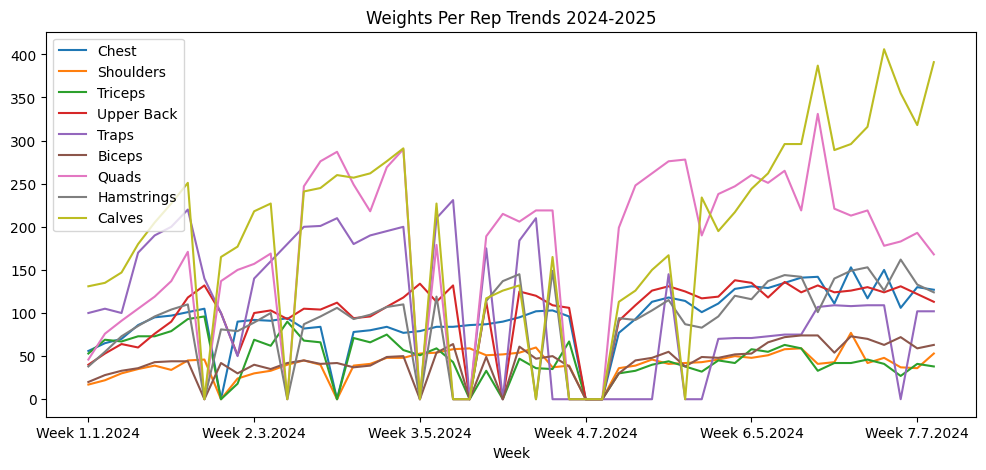

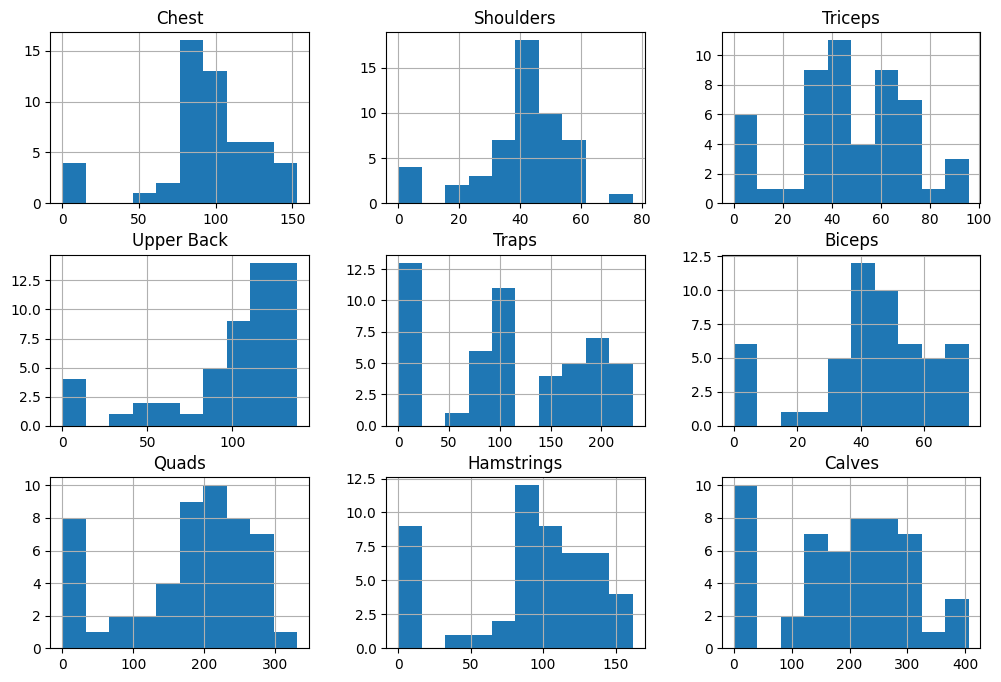

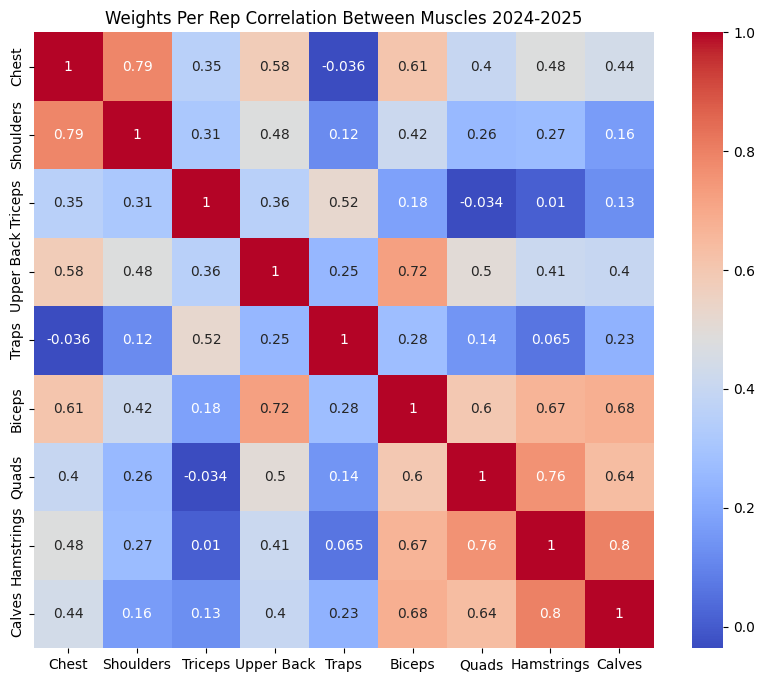

Highest correlation: ('Hamstrings', 'Calves') = 0.80
Lowest correlation: ('Chest', 'Traps') = -0.04



In [60]:
for metric, df in tables_2024_cleaned.items():
    print(f"Metric: {metric}")
    ignore_cols = ["Week", "Week_Number", "Frame", "Week_in_Frame"]
    muscle_cols = [c for c in df.columns if c not in ignore_cols]
    print(df.info())
    print(df.describe())
    print((df != 0).sum())
    #plot
    df.plot(x= "Week", y= muscle_cols, figsize=(12,5), title=f"{metric} Trends 2024-2025")
    #histogram
    df[muscle_cols].hist(figsize=(12,8))
    #heatmap
    corr_matrix = df[muscle_cols].corr()  # now only muscles
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title(f"{metric} Correlation Between Muscles 2024-2025")
    plt.show()
    #shows my high/lows
    mask = np.eye(len(corr_matrix), dtype=bool)
    corr_values = corr_matrix.mask(mask)
    max_corr = corr_values.stack().idxmax()
    max_value = corr_values.stack().max()
    min_corr = corr_values.stack().idxmin()
    min_value = corr_values.stack().min()
    print(f"Highest correlation: {max_corr} = {max_value:.2f}")
    print(f"Lowest correlation: {min_corr} = {min_value:.2f}\n")
    plt.show()

# 2022-2023 | 2024-2025 Merge

## Merging Tables

In [61]:
for metric, df in tables_2022_cleaned.items():
    df['Week_Number'] = (df['Frame'] - 1) * 8 + df['Week_in_Frame']

# 2024-2025
for metric, df in tables_2024_cleaned.items():
    # start numbering after the last week of 2022-2023
    max_week_2022 = tables_2022_cleaned[metric]['Week_Number'].max()
    df['Week_Number'] = (df['Frame'] - 1) * 8 + df['Week_in_Frame'] + max_week_2022

In [62]:
the_merged = {
    metric: pd.concat([tables_2022_cleaned[metric], tables_2024_cleaned[metric]], ignore_index=True)
    for metric in metrics
}

In [63]:
for metric, df in the_merged.items():
    df['Frame'] = df['Frame'].astype(int)
    df['Week_in_Frame'] = df['Week_in_Frame'].astype(int)
    year_offset = df['Week'].str.endswith('2024') | df['Week'].str.endswith('2025')
    max_week_2022 = df.loc[~year_offset, 'Frame'].max() * 10
    df['Week_Number'] = (df['Frame'] - 1) * 8 + df['Week_in_Frame']
    df.loc[year_offset, 'Week_Number'] += df.loc[~year_offset, 'Week_Number'].max()

## Cleaning/Verficiation

In [64]:
for metric, df in the_merged.items():
    print(f"=== {metric} Merged ===")
    print(df.info())
    print(df.describe())
    print("Non-zero counts per muscle:")
    print((df.iloc[:, 1:] != 0).sum())

    ignore_cols = ["Week", "Week_Number", "Frame", "Week_in_Frame"]
    muscle_cols = [c for c in df.columns if c not in ignore_cols]

=== Total Load Merged ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Week           92 non-null     object
 1   Week_Number    92 non-null     int64 
 2   Frame          92 non-null     int64 
 3   Week_in_Frame  92 non-null     int64 
 4   Chest          92 non-null     Int64 
 5   Shoulders      92 non-null     Int64 
 6   Triceps        92 non-null     Int64 
 7   Upper Back     92 non-null     Int64 
 8   Traps          92 non-null     Int64 
 9   Biceps         92 non-null     Int64 
 10  Quads          92 non-null     Int64 
 11  Hamstrings     92 non-null     Int64 
 12  Calves         92 non-null     Int64 
dtypes: Int64(9), int64(3), object(1)
memory usage: 10.3+ KB
None
       Week_Number      Frame  Week_in_Frame         Chest    Shoulders  \
count    92.000000  92.000000      92.000000          92.0         92.0   
mean     4

## EDA

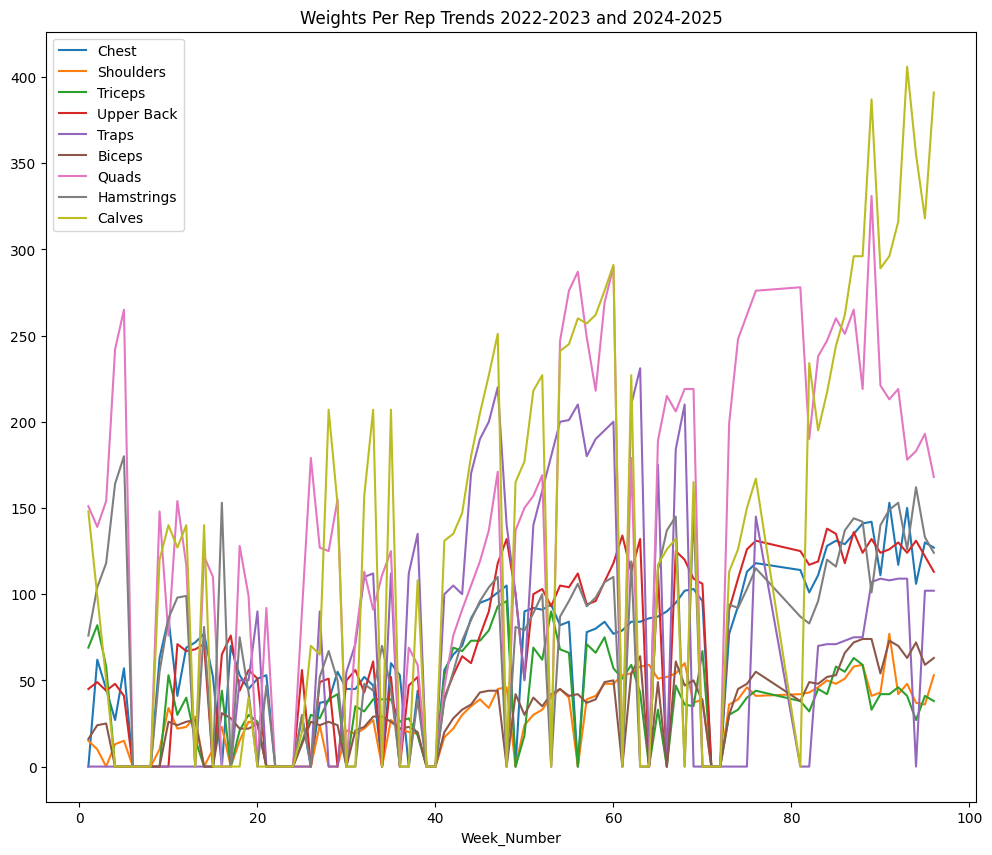

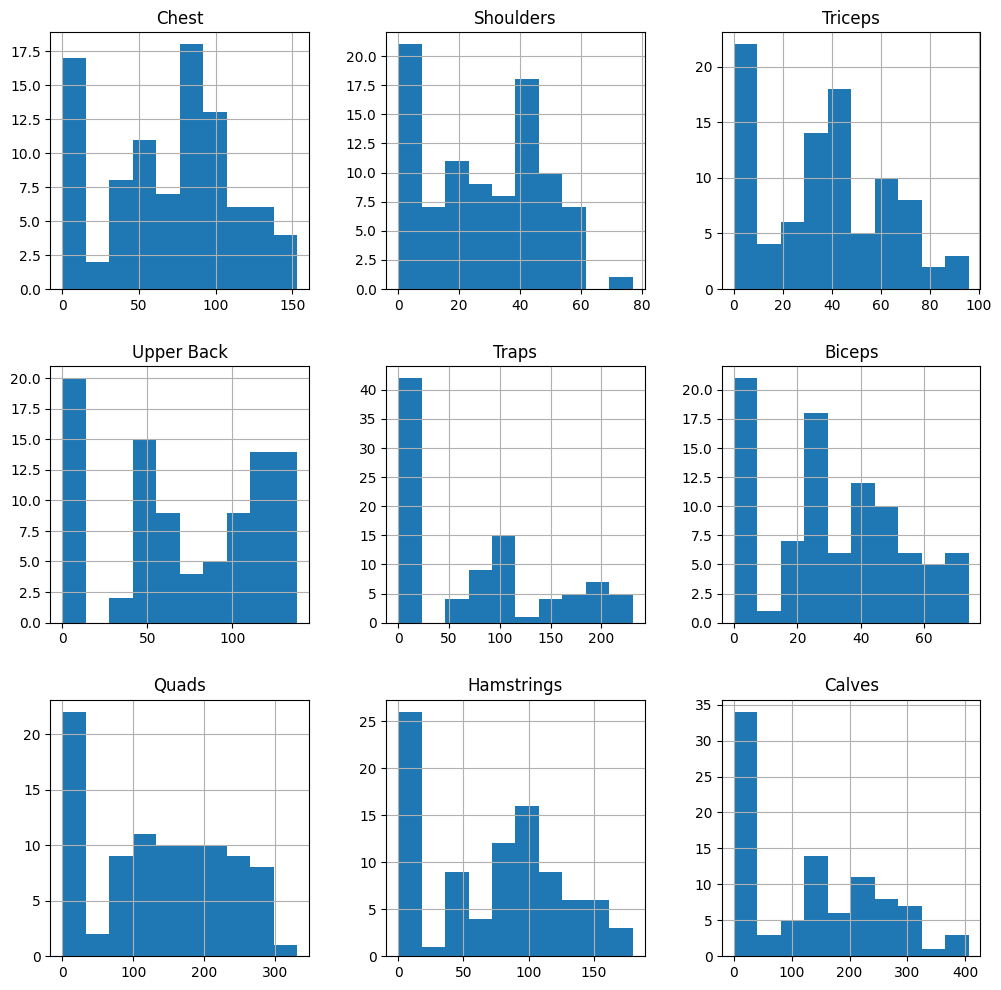

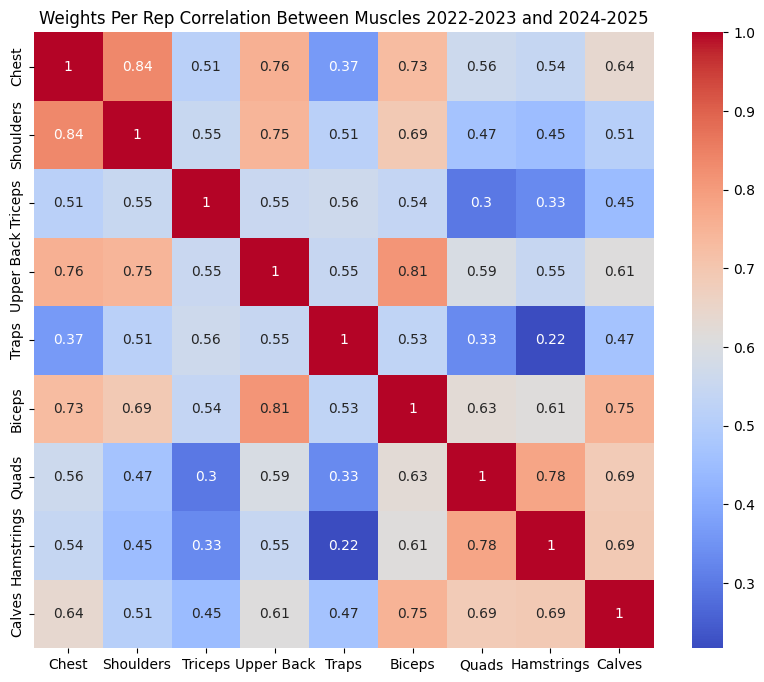

Highest correlation: ('Chest', 'Shoulders') = 0.84
Lowest correlation: ('Traps', 'Hamstrings') = 0.22



In [65]:
df.plot(
        x='Week_Number',
        y=muscle_cols,
        figsize=(12,10),
        title=f"{metric} Trends 2022-2023 and 2024-2025"
    )
# Histograms
df[muscle_cols].hist(figsize=(12,12))
#Heatmap
corr_matrix = df[muscle_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title(f"{metric} Correlation Between Muscles 2022-2023 and 2024-2025")
plt.show()

# Shows highest / lowest correlation values
mask = np.eye(len(corr_matrix), dtype=bool)
corr_values = corr_matrix.mask(mask)
max_corr = corr_values.stack().idxmax()
max_value = corr_values.stack().max()
min_corr = corr_values.stack().idxmin()
min_value = corr_values.stack().min()
print(f"Highest correlation: {max_corr} = {max_value:.2f}")
print(f"Lowest correlation: {min_corr} = {min_value:.2f}\n")

# Exporting

In [66]:
from google.colab import files
import os

# Create a folder for output
os.makedirs("output", exist_ok=True)

# Save the tables
for metric, df in tables_2022_cleaned.items():
    df.to_csv(f"output/2022-2023_{metric.replace(' ', '_')}.csv", index=False, float_format='%.2f')

for metric, df in tables_2024_cleaned.items():
    df.to_csv(f"output/2024-2025_{metric.replace(' ', '_')}.csv", index=False, float_format='%.2f')

for metric, df in the_merged.items():
    df.to_csv(f"output/merged_{metric.replace(' ', '_')}.csv", index=False, float_format='%.2f')

import shutil
from google.colab import files

shutil.make_archive("workout_analysis", 'zip', "output")
files.download("workout_analysis.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>